In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

## Library MyConvexHull

In [7]:
import math

#myConvexHull
#=======================
listHull = []
'''Untuk Mengetahui titik berada di kiri atau kanan garis'''
def calculateDeterminant(point1, point2,point3):
    return (point1[0]*point2[1]) + (point3[0]*point1[1]) + (point2[0]*point3[1]) - (point3[0]*point2[1]) - (point2[0]*point1[1]) - (point1[0]*point3[1])


'''Mencari 2 titik awal sebagai pembagi awal
    2 titik tersebut diambil berdasarkan nilai x terkecil dan nilai x terbesar'''
def find2InitialPoint(listPoint):
    minPoint = listPoint[0]
    maxPoint = listPoint[0]

    for point in listPoint :
        if(point[0] >= maxPoint[0]) :
            maxPoint = point
        
        if(point[0] <= minPoint[0]) :
            minPoint = point

    return minPoint, maxPoint

'''Menghitung jarak titik ke garis'''
def calculateDistance(point1, point2, point3) : #Point 3 yang akan dicari jarak ke garis point1-point2
    return abs((point3[0]-point1[0]) * (point2[1]-point1[1]) - (point3[1]-point1[1]) * (point2[0]-point1[0]))
    '''Hasil Penyederhanaan rumus jarak titik ke garis abs(ax+by+c/sqrt(a^2+b^2)
        namun sqrt(a^2+b^2) tidak diperhitungkan'''


'''Mencari titik dengan jarak terjauh dari garis'''
def findMaxDistance(point1, point2, listPoint):
    max = 0
    idxMax = 0

    for i in range(len(listPoint)):
        tempMax = calculateDistance(point1, point2, listPoint[i])
        if(tempMax >= max) :
            idxMax = i
            max = tempMax
    
    return listPoint[idxMax]
    

'''Membagi Menjadi 2 sisi'''
def divideSide(point1, point2, listPoint):
    leftSide = []
    rightSide = []

    for point in listPoint:
        if(any(point1 != point)) and (any(point2 != point)) :
            if(calculateDeterminant(point1, point2, point) > 0) :
                leftSide.append(point)
            elif(calculateDeterminant(point1, point2, point) < 0):
                rightSide.append(point)
        
    return leftSide,rightSide
        
#Menyelesaikan sisi kiri dari 2 titik awal
def solveLeftSide(point1, point2, leftListPoint, countPointInLeft):
    if( countPointInLeft > 0 ):
        pMax = findMaxDistance(point1, point2, leftListPoint)
        listHull.append(pMax)
        #Bagi Kembali sisi
        firstLeftSide,_ = divideSide(point1, pMax, leftListPoint)
        secondLeftSide,_ = divideSide(pMax, point2, leftListPoint)
        solveLeftSide(point1, pMax, firstLeftSide, len(firstLeftSide))
        solveLeftSide(pMax, point2, secondLeftSide, len(secondLeftSide))

#menyelesaikan sisi kanan dari 2 titik awal
def solveRightSide(point1, point2, rightListPoint, countPointInRight):
    if( countPointInRight > 0 ):
        pMax = findMaxDistance(point1, point2, rightListPoint)
        listHull.append(pMax)
        #Bagi Kembali sisi
        _,firstRightSide= divideSide(point1, pMax, rightListPoint)
        _,secondRightSide = divideSide(pMax, point2, rightListPoint)

        solveRightSide(point1, pMax, firstRightSide, len(firstRightSide))
        solveRightSide(pMax, point2, secondRightSide, len(secondRightSide))


#Mengembalikan points yang menjadi point untuk convexHull
def ConvexHull(listAllPoint):
    minPoint, maxPoint = find2InitialPoint(listAllPoint)
    listHull.append(minPoint)
    listHull.append(maxPoint)
    
    leftSide, rightSide = divideSide(minPoint, maxPoint, listAllPoint)
    solveLeftSide(minPoint, maxPoint, leftSide, len(leftSide))
    solveRightSide(minPoint, maxPoint, rightSide, len(rightSide))

    #Clokwise Order point
    centerX = sum(hull[0] for hull in listHull)/len(listHull)
    centerY = sum(hull[1] for hull in listHull)/len(listHull)
    listHull.sort(key=lambda point:math.atan2(point[1]-centerY, point[0]-centerX))
    orderedHull = []
    for i in range(len(listHull)):
        orderedHull.append(listHull[i])
    
    #kosongkan kembali listHull
    for i in range(len(orderedHull)):
        listHull.pop()
    
    return orderedHull

#menkoneksikan dari satu titik ke titik lain
def connectThePoint(hullPoint):
    lenList = len(hullPoint)
    connectPointX = []
    connectPointY = []

    for i in range(lenList):
        if(i == lenList - 1 ):
            connectPointX.append([hullPoint[i][0], hullPoint[0][0]])
            connectPointY.append([hullPoint[i][1], hullPoint[0][1]])
        else:
            connectPointX.append([hullPoint[i][0], hullPoint[i+1][0]])
            connectPointY.append([hullPoint[i][1], hullPoint[i+1][1]])
    
    return connectPointX, connectPointY


## use library myConvexHull

(150, 5)


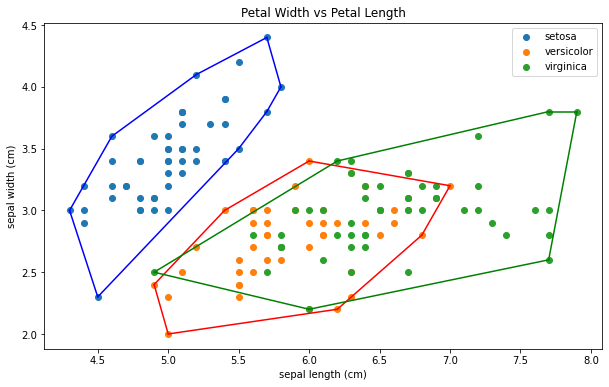

In [10]:
data = datasets.load_iris()
# create df
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    connectPointX, connectPointY = connectThePoint(hull)
    for e in range(len(hull)):
        plt.plot(connectPointX[e], connectPointY[e], colors[i])
plt.legend()

(150, 5)


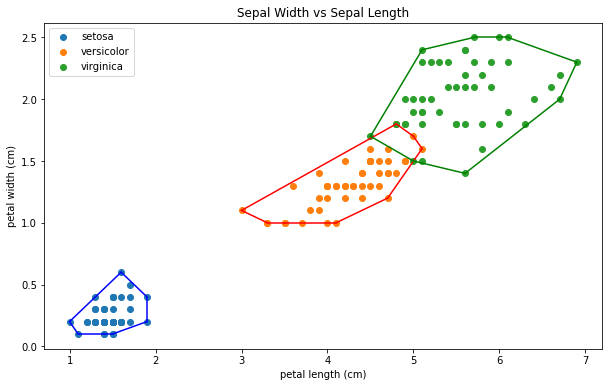

In [4]:
#load
data2 = datasets.load_iris()
# create df
df2 = pd.DataFrame(data2.data, columns=data2.feature_names)
df2['Target'] = pd.DataFrame(data2.target)
print(df2.shape)
df2.head()

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Sepal Width vs Sepal Length')
plt.xlabel(data2.feature_names[2])
plt.ylabel(data2.feature_names[3])
for i in range(len(data2.target_names)):
    bucket2 = df2[df2['Target'] == i]
    bucket2 = bucket2.iloc[:,[2,3]].values
    hull2 = ConvexHull(bucket2)
    plt.scatter(bucket2[:, 0], bucket2[:, 1], label=data2.target_names[i])
    connectPointX2, connectPointY2 = connectThePoint(hull2)
    for e in range(len(hull2)):
        plt.plot(connectPointX2[e], connectPointY2[e], colors[i])
plt.legend()

(178, 14)


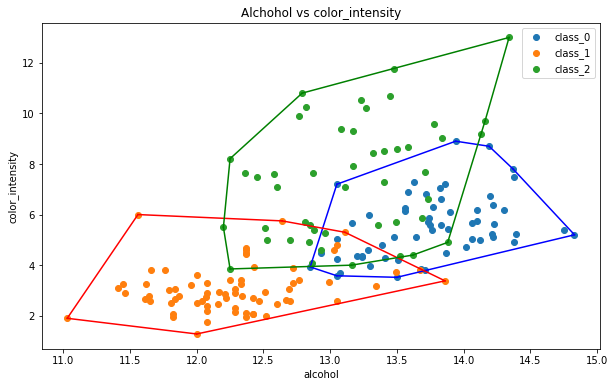

In [5]:
#load
data3 = datasets.load_wine()
#create df
df3 = pd.DataFrame(data3.data, columns=data3.feature_names)
df3['Target'] = pd.DataFrame(data3.target)
print(df3.shape)
df3.head()
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Alchohol vs color_intensity')
plt.xlabel(data3.feature_names[0])
plt.ylabel(data3.feature_names[9])
for i in range(len(data3.target_names)):
    bucket3 = df3[df3['Target'] == i]
    bucket3 = bucket3.iloc[:,[0,9]].values
    hull3 = ConvexHull(bucket3)
    plt.scatter(bucket3[:, 0], bucket3[:, 1], label=data3.target_names[i])
    connectPointX3, connectPointY3 = connectThePoint(hull3)
    for e in range(len(hull3)):
        plt.plot(connectPointX3[e], connectPointY3[e], colors[i])
plt.legend()